In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [26]:
df_test = pd.read_csv("dataset_titanic/test.csv")
df_train = pd.read_csv("dataset_titanic/train.csv")



In [27]:
print(df_train.isna().sum())
print(df_train.isna().sum())
# colnames = ['Pclass', 'Name', 'Sex', 'Age']
# df2 = df[colnames + ['Embarked']]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Data Treatment

<h3> The column Cabin will be dropped and the column Age the Nan data will be assumed the median value over the all sample. The column Embarked will be filled with the values which occur with more frequency <h3>

In [28]:
df_train.drop('Cabin',axis=1,inplace=True)
df_train["Age"].fillna(df_train['Age'].median(),inplace=True)
df_train['Embarked'].fillna("S",inplace=True)
df_train['Fare'].fillna(df_train['Fare'].mean(), inplace=True)


df_test.drop('Cabin',axis=1,inplace=True)
df_test["Age"].fillna(df_test['Age'].median(),inplace=True)
df_test['Embarked'].fillna("S",inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [29]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [31]:
print(df_train.groupby(df_train['Pclass']).sum())
# df_train.groupby(df_train['Pclass']).mean()
# ['Survived', 'Age']
# if (df_train['Survived']) == 1:
df_train.groupby(df_train['Pclass']).count()['Survived']

        PassengerId  Survived       Age  SibSp  Parch        Fare
Pclass                                                           
1             99705       136   7951.42     90     77  18177.4125
2             82056        87   5476.83     74     70   3801.8417
3            215625       119  12732.92    302    193   6714.6951


Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [32]:
xa = df_train.groupby(df_train['Pclass']).count()

xa

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,,,,,,,,,,
1,216,216,216,216,216,216,216,216,216,216
2,184,184,184,184,184,184,184,184,184,184
3,491,491,491,491,491,491,491,491,491,491


In [33]:
dff = df_train[df_train['Survived'] == 1]
dfd = df_train[df_train['Survived'] == 0]


In [34]:
df2 = dff.groupby(df_train['Pclass']).count()
df3 = dfd.groupby(df_train['Pclass']).count()
df_all = df_train.groupby(df_train['Pclass']).count()
print(df2['Survived'])
print(df3['Survived'])
print(df_all['Survived'])

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


In [35]:
df2['Survived'].index
df2['Survived'].values

x = [df2['Survived'].values[i]/df_all['Survived'].values[i] for i in range(len(df2['Survived'].values))]
y = [df3['Survived'].values[i]/df_all['Survived'].values[i] for i in range(len(df2['Survived'].values))]
print(x, y)

[0.6296296296296297, 0.47282608695652173, 0.24236252545824846] [0.37037037037037035, 0.5271739130434783, 0.7576374745417516]


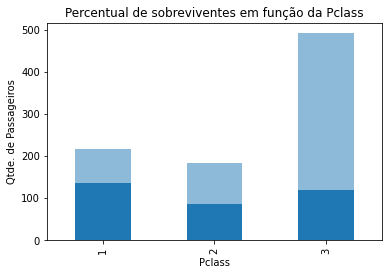

In [36]:
df2['Survived'].plot(kind = "bar")
df_all['Survived'].plot(kind= "bar", alpha = 0.5)
plt.title("Percentual de sobreviventes em função da Pclass")
plt.ylabel("Qtde. de Passageiros")
plt.show()


In [37]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [38]:
def survival_rate(column,t):
    df = pd.DataFrame()
    df['total'] = df_train.groupby(column).size()
    df['Survived'] = df_train.groupby(column).sum()['Survived']
    df['percentage'] = round(df['Survived']/df['total']*100,2)
    #print(df_train)
    
    df['Survived'].plot(kind="bar")
    df['total'].plot(kind="bar",alpha=0.5, title="Survivors per" +str(column))
    plt.show()

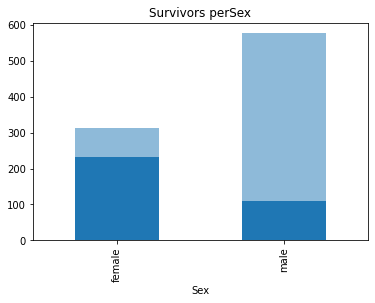

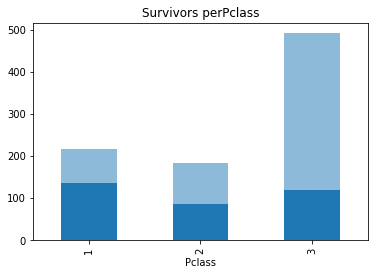

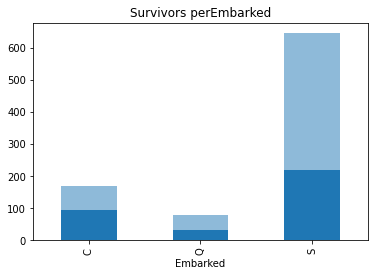

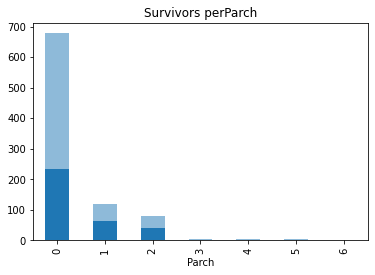

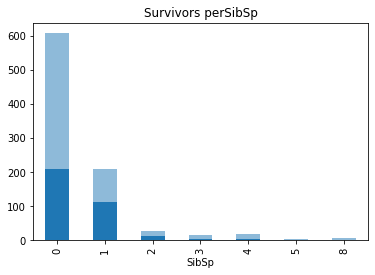

In [39]:
survival_rate("Sex","barh")
survival_rate("Pclass","barh")
survival_rate("Embarked","barh")
survival_rate("Parch","barh")
survival_rate("SibSp","barh")

# Converting string to value

In [40]:
df_train['Sex'] = pd.Categorical(df_train['Sex']).codes
df_train['Embarked'] = pd.Categorical(df_train['Embarked']).codes

df_test['Sex'] = pd.Categorical(df_test['Sex']).codes
df_test['Embarked'] = pd.Categorical(df_test['Embarked']).codes

In [41]:
df_train['Embarked'].unique()

array([2, 0, 1], dtype=int8)

# Training Model

In [42]:
predictors = ["Pclass","Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X = df_train[predictors]
y =  df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

# Logistic Regression Method

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

def predict_model(model_pipe, X_train, y_train, X_test, y_test):
    model_pipe.fit(X_train, y_train)
    y_pred = model_pipe.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # score_model = model_pipe.score(X_test, y_test)
    # score_model = model_pipe.score(y_test, y_pred)
    return score, mae

In [73]:
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

pipe_logistic = Pipeline([('estimator', LogisticRegression(random_state=20))])
pipe_forest =  Pipeline([('estimator', RandomForestClassifier(random_state=1, n_estimators=20))])
pipe_tree = Pipeline([('estimator', DecisionTreeClassifier(random_state = 1))])


score_logistic, mae_logistic = predict_model(pipe_logistic, X_train, y_train, X_test, y_test)
score_forest, mae_forest = predict_model(pipe_forest, X_train, y_train, X_test, y_test)
score_tree, mae_tree = predict_model(pipe_tree, X_train, y_train, X_test, y_test)

print(score_logistic, mae_logistic)
print(score_forest, mae_forest)
print(score_tree, mae_tree)

0.7937219730941704 0.2062780269058296
0.7937219730941704 0.2062780269058296
0.7623318385650224 0.23766816143497757


In [45]:

pred = pd.DataFrame({
    "Survived_original": y_test,
    "Survived_predicted": pipe_tree.predict(X_test),
    # "Survived_proba": np.transpose(pipe_logistic.predict_proba(X_test))[1]
    "Survived_proba": [pipe_tree.predict_proba(X_test)[i][1] for i in range(len(pipe_tree.predict_proba(X_test)))]
})
pred['Comparison'] = pred['Survived_original'] == pred['Survived_predicted']


In [46]:
def dataframe(pipe_model, X_test, y_test):
    pred = pd.DataFrame({
    "Survived_original": y_test,
    "Survived_predicted": pipe_model.predict(X_test),
    "Survived_proba": [pipe_model.predict_proba(X_test)[i][1] for i in range(len(pipe_model.predict_proba(X_test)))]})
    pred['Comparison'] = pred['Survived_original'] == pred['Survived_predicted']
    return pred
    

In [47]:
table_tree = dataframe(pipe_tree, X_test, y_test)
table_logistic = dataframe(pipe_logistic, X_test, y_test)

In [48]:
tx = []
xy = pipe_logistic.predict_proba(X_test)
tx.append([xy[i][1] for i in range(len(xy))])

In [75]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':list(range(1,5)),'min_samples_split':list(range(2,10,2)),'n_estimators':list(range(10,50,10))}

clf_rf2=RandomForestClassifier(random_state=1)
clf_gs=GridSearchCV(clf_rf2,params,scoring='accuracy')
clf_gs.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]},
             scoring='accuracy')

In [76]:
clf_gs.best_score_
clf_gs.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 30}

In [77]:
clf_rf3 = RandomForestClassifier(random_state=1,min_samples_leaf=3,min_samples_split=8,n_estimators=30)
clf_rf3.fit(X_train,y_train)
print('train accuracy =',clf_rf3.score(X_train,y_train))
print('test accuracy =',clf_rf3.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
scores_rf3 = cross_val_score(clf_rf3,X,y,scoring='accuracy',cv=5)
print("cross validation accuracy =", scores_rf3.mean())

train accuracy = 0.8862275449101796
test accuracy = 0.7802690582959642
cross validation accuracy = 0.8327976900382902


In [78]:
feat_imp = pd.DataFrame(clf_rf3.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance',ascending=False)

,Importance
Sex,0.366855
Fare,0.201260
Age,0.171738
Pclass,0.117001
SibSp,0.061253
Embarked,0.041643
Parch,0.040251
